markdown使用说明：<https://blog.csdn.net/Dance_sheng/article/details/102662891>

各种API文档说明汇总：<https://devdocs.io/>

seaborn的API文档说明：<https://seaborn.pydata.org/generated/seaborn.heatmap.html>

sns的color_palette以及plt的cmap（_r代表颜色反转）：<https://blog.csdn.net/weixin_41391619/article/details/115719116>

以下案例中引用数据（预览案例前必须先运行）

In [1]:
import pandas as pd

titanic = pd.read_csv('./datasets/titanic.csv', index_col=0)  #第一列survived为二分类判断是否存货，一般做分类用
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())
titanic['Embarked'] = titanic['Embarked'].fillna('S')
del titanic['Cabin']

adv = pd.read_csv('./datasets/advertorial.csv')  #纯指标，一般做回归用
adv = adv.dropna()

In [2]:
titanic.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


<AxesSubplot:xlabel='Embarked', ylabel='Sex'>

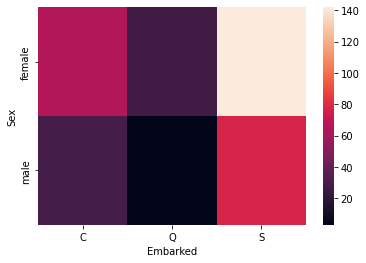

In [26]:
import seaborn as sns

heat_data = titanic.pivot_table(index='Sex',columns='Embarked',values='Survived',aggfunc='sum')
sns.heatmap(aa)

In [3]:
adv.head(1)

,点赞数,转发数,热度指数,文章评级,浏览量
0,2646,1347.0,7,5,260004


In [26]:
aa = ax4.bar(x= sex_num.index, height=sex_num.values)

In [28]:
ax.bar_label(aa, padding=3)

[Text(0, 3, '577'), Text(0, 3, '314')]

# matplot绘图总结

## 画图基本定式及基本说明

1. seaborn绘图返回画布值，plt绘图返回图中特殊值
2. 涉及文本设置的，都在matplotlib.text里面
3. 注意axis作图和plt作图的区别，在使用对应方法时，axis作图一般为set_,plt作图则不需要set_

### 画布画板基本元素

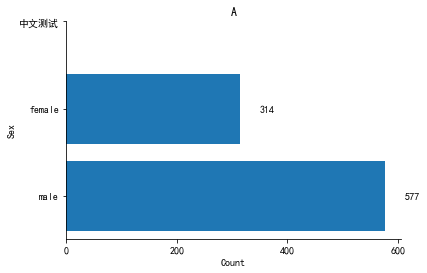

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  #忽略警告类提示
plt.rcParams['font.sans-serif'] = 'SimHei' #设置字体，让中文不为乱码

sex_num = titanic['Sex'].value_counts()
fig, ax = plt.subplots()

aa = ax.barh(y = sex_num.index, width=sex_num.values)
ax.bar_label(aa, padding=20) #让条形图上方显示标签，pandding为标签距离条形图的距离

ax.spines['top'].set_visible(False)  #让画布顶部轴不可见
ax.spines['right'].set_visible(False)  #让画布右侧轴不可见

ax.set_xlabel('Count') #给x轴设置标签
ax.set_ylabel('Sex') #给y轴设置标签

ax.set_xticks(range(0, 601, 200)) #给x轴刻度设置可见值
ax.set_yticks(['female', 'male', '中文测试']) #给y轴刻度设置可见值

ax.set_title('A') #给画布添加标题 $$为斜体
ax.set_aspect('auto')  #调整横纵单位比，默认‘auto’

ax.set_axis_on()  #默认on，如果想让坐标轴消失，调用set_axis_off方法，plt控制时，使用plt.axis('off')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rcParams
plt.rcParams['lines.linestyle'] = '-.' #线条样式
plt.rcParams['lines.linewidth'] = 3 #线条宽度
plt.rcParams['font.sans-serif'] = 'SimHei' #设置字体
plt.rcParams['axes.unicode_minus'] = False #字符显示
plt.rcParams['figure.dpi'] = 20 # 图像分辨率,以点/英寸为单位设置图形的分辨率。
rcParams['figure.figsize'] = 11, 8 #设置画板大小

sns.set()
sns.set_context(
    "notebook",
    font_scale=1.5,
    rc={
        "figure.figsize": (11, 8),
        "axes.titlesize": 18
    }
)



### 多个图分布到一个画板上

方法1适用于matplotlib画图，方法2适用于seaborn画图

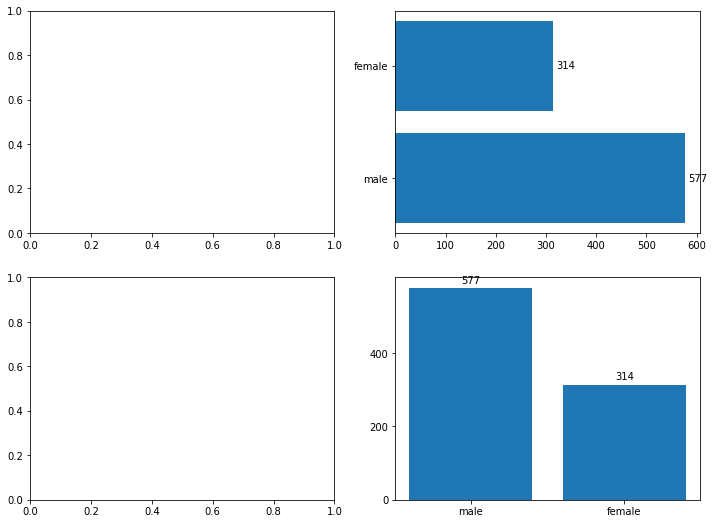

In [16]:
#方法1
import numpy as np
import matplotlib.pyplot as plt
sex_num = titanic['Sex'].value_counts()
fig, axes =  plt.subplots(2, 2, figsize=(12, 9)) 
'''
画板上有 2 * 2张画布，总大小为（12 * 9）
如果想让画布每一列上的横坐标相同，可以让sharex = True
如果想让画布每一行上的纵坐标相同，可以让sharey = True
很多时候如果只画一个图，可以使用fig, ax = plt.subplots()
还有一种写法，但不建议：
fig = plt.figure()
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
'''
ax1 = axes[0,1]
a1 = ax1.barh(y = sex_num.index, width=sex_num.values)
ax1.bar_label(a1, padding=3)

ax3 = axes[1,1]
a3 = ax3.bar(x= sex_num.index, height=sex_num.values)
ax3.bar_label(a3, padding=3)
ax3.set_yticks(range(0,600,200))

plt.show()

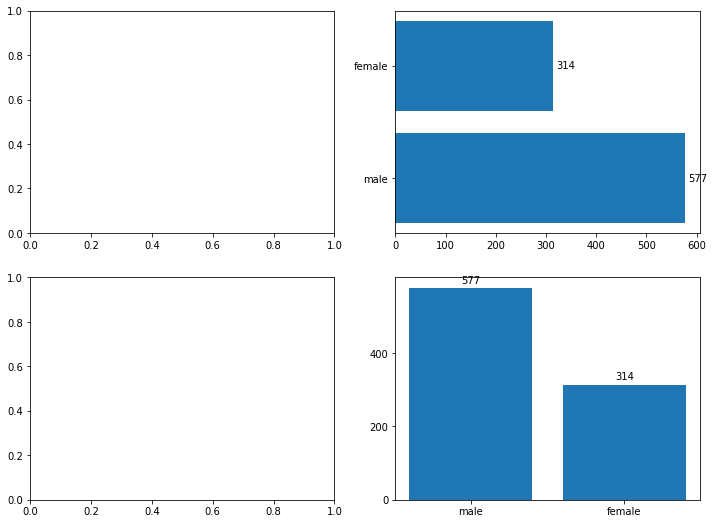

In [45]:
#方法2
import numpy as np
import matplotlib.pyplot as plt
sex_num = titanic['Sex'].value_counts()
fig, axes =  plt.subplots(2, 2, figsize=(12, 9)) 
'''
画板上有 2 * 2张画布，总大小为（12 * 9）
如果想让画布每一列上的横坐标相同，可以让sharex = True
如果想让画布每一行上的纵坐标相同，可以让sharey = True
很多时候如果只画一个图，可以使用fig, ax = plt.subplots()
还有一种写法，但不建议：
fig = plt.figure()
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)
'''
plt.sca(axes[0,1])
a1 = plt.barh(y = sex_num.index, width=sex_num.values)
axes[0,1].bar_label(a1, padding=3)

plt.sca(axes[1,1])
a3 = plt.bar(x= sex_num.index, height=sex_num.values)
plt.bar_label(a3, padding=3)
plt.yticks(range(0,600,200))

plt.show()

### 多个图分布到一个画布上

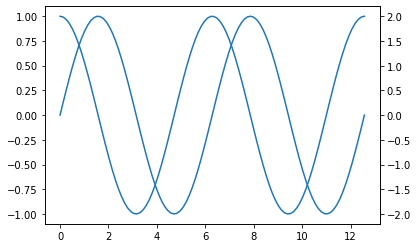

In [44]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(1, 1)             
 
ax2 = ax1.twinx()  # 让2个子图的x轴一样，同时创建副坐标轴。
 
# 作y=sin(x)函数
x1 = x2 = np.linspace(0, 4 * np.pi, 100)
y1 = np.sin(x1)
ax1.plot(x1, y1)
 
#  作y = cos(x)函数
y2 = 2 * np.cos(x1)
ax2.plot(x2, y2)

plt.show()

## 单指标绘图

## 多指标绘图

## 单维度绘图

## 双维度绘图

### 热力图

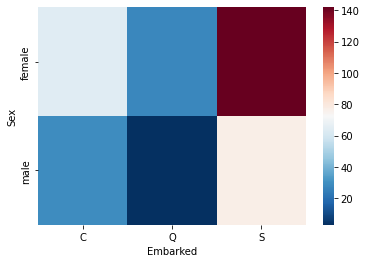

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

heat_data = titanic.pivot_table(index='Sex',columns='Embarked',values='Survived',aggfunc='sum')

fig, ax = plt.subplots()
plt.sca(ax)
sns.heatmap(heat_data, cmap='RdBu_r') #cmap色谱参数见最上方链接
plt.show()

# 科学计数

## 无穷大、无穷小

In [23]:
#无穷大
float('inf')

inf

## 小精度浮点数，大精度浮点数对应科学库
小精度用math，大精度用mpmath(mpmath.mp.dps控制数字位数，含整数位）

In [6]:
import math
from mpmath import mp
print('pi:',math.pi)
mp.dps = 10 + 1
print(mp.pi)

pi: 3.141592653589793
3.1415926536


# numpy使用注意

## 切一行或一列时生成二维向量而不是一维向量

In [20]:
import numpy
import numpy
A = np.array([[1, 2, 3],
              [4, 5, 6]])
print(A[:,0])
print(A[:,[0]]) # 或者A[:,0: 1]
print(A[0,:])
print(A[[0],:]) # 或者A[0: 1,:]
print(A[0,1])
print(A[[0],[1]])

[1 4]
[[1]
 [4]]
[1 2 3]
[[1 2 3]]
2
[2]


## inner() 二维行向量-内积，二维列向量-张量积

In [28]:
import numpy as np

a_row = np.array([[1, 2, 3]])
b_row = np.array([[4, 3, 2]])
a_dot_b = np.inner(a_row, b_row)
print(a_dot_b)

a_col = np.array([[1],  [2], [3]])
b_col = np.array([[-1], [0], [1]])
a_dot_b = np.inner(a_col, b_col)
print(a_dot_b)

[[16]]
[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]


## 两个相同维度的矩阵直接通过*相乘，为哈达玛积

## a.dot(b) or a@b都为矩阵乘法

In [29]:
import numpy as np
a = np.array([[1,2,3],[4,5,6]])
b = np.array([[1],[2],[3]])
print(a.dot(b))
print(a@b)

[[14]
 [32]]
[[14]
 [32]]


# 用streamlit开发数据科学APP

streamlit的官网地址：<https://docs.streamlit.io/>

streamlit的github上的样例：<https://github.com/orgs/streamlit/repositories>
## 使用方式基本说明
1. 必须存为.py工程
2. 需要在命令行通过`streamlit run 文件`运行，从而自动打卡本地网页，端口是8501
3. 如果需要在页面展示图表需要用st.pyplot(fig)进行展示  （fig为plt.Figure()生成的实例对象）

## 各功能使用方式

### 滑轨

In [ ]:
import streamlit as st
with st.sidebar:
    num_digits = st.slider('Number of decimal digits:',
                           min_value = 10000, 
                           max_value = 100000,
                           step = 10000)
#num_digits接收到的就是前端拖动的最终值

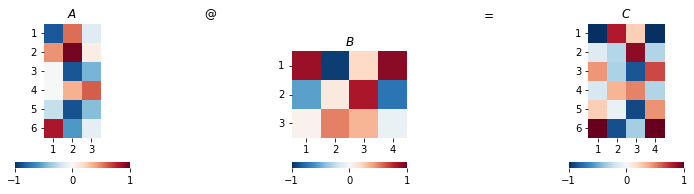

In [18]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Repeatability
np.random.seed(7)

# Generate matrix A and B
m = 6
p = 3
n = 4

A = np.random.uniform(-1,1,m*p).reshape(m, p)
B = np.random.uniform(-1,1,p*n).reshape(p, n)

C = A@B

all_max = 1
all_min = -1

#%% matrix multiplication, first perspective

fig, axs = plt.subplots(1, 5, figsize=(12, 3))

plt.sca(axs[0])
ax = sns.heatmap(A,cmap='RdBu_r',vmax = all_max,vmin = all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1,m+1), xticklabels=np.arange(1,p+1))
ax.set_aspect("equal")
plt.title('$A$')
plt.yticks(rotation=0) 


plt.sca(axs[1])
plt.title('$@$')
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(B,cmap='RdBu_r',vmax = all_max,vmin = all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1,p+1), xticklabels=np.arange(1,n+1))
ax.set_aspect("equal")
plt.title('$B$')
plt.yticks(rotation=0) 

plt.sca(axs[3])
plt.title('$=$')
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(C,cmap='RdBu_r',vmax = all_max,vmin = all_min,
                 cbar_kws={"orientation": "horizontal"},
                 yticklabels=np.arange(1,m+1), xticklabels=np.arange(1,n+1))
ax.set_aspect("equal")
plt.title('$C$')
plt.yticks(rotation=0) 

plt.show()